In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
%matplotlib inline

In [2]:
path=r"../datas/digis/train.csv"

In [3]:
data = pd.read_csv(path)
data.shape

(42000, 785)

In [4]:
#手迹像素信息
images = data.iloc[:,1:].values
#标签信息
target = data.iloc[:,:1].values.reshape(-1)

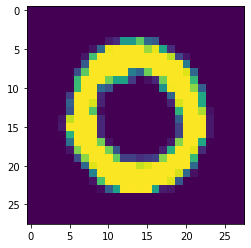

In [5]:
plt.imshow(images[1].reshape(28,28))

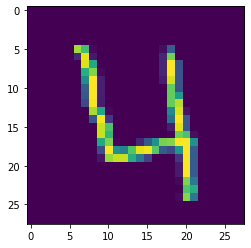

In [6]:
plt.imshow(images[3].reshape(28,28))

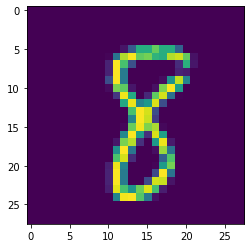

In [7]:
plt.imshow(images[222].reshape(28,28))

In [8]:
target = data.iloc[:,:1].values.reshape(-1)
target

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [9]:
train_num=15000
test_num=7500
x_train,x_test=images[:train_num],images[-1*test_num:]
y_train,y_test=target[:train_num],target[-1*test_num:]

In [10]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

In [ ]:
print(type(svc))

In [ ]:
pca=PCA(n_components=0.8, #设置特征值>0.8作为主成分
        whiten=True #白化
       )

In [ ]:
pca.fit(images)

In [ ]:
x_train_pca=pca.transform(x_train) #降低维度处理
x_test_pca=pca.transform(x_test)

In [18]:
newsvc=SVC()
newsvc.fit(x_train_pca,y_train)
newsvc.score(x_test_pca,y_test)

0.9714666666666667

In [19]:
print(type(newsvc))

<class 'sklearn.svm.classes.SVC'>


In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train_pca,y_train)
#数据预测
knn.score(x_test_pca,y_test)

0.9476

In [21]:
print(type(knn))

<class 'sklearn.neighbors.classification.KNeighborsClassifier'>


In [ ]:
y_svc=newsvc.predict(x_test_pca)
#绘制50个数据
plt.figure(figsize = (1.8*10,2.5*5))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.axis('off')
    plt.title('trainig: '+str(y_test[i])+'\n'+'predict: '+str(y_svc[i]))
plt.show()

In [ ]:
from sklearn.grid_search import GridSearchCV
mx = SVC(kernel='rbf', probability=True) #创建SVC方法，mx用于测试
param_grid = {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}#测试的函数
grid_search = GridSearchCV(mx, param_grid, n_jobs=1, verbose=1) #训练自动循环早最优化的参数
grid_search.fit(x_train_pca, y_train)#训练数据

best_parameters = grid_search.best_estimator_.get_params()#寻找最优的参数
    # for para, val in best_parameters.items():
    #    print( para, val)
mx = SVC(kernel='rbf', C=best_parameters['C'], gamma=best_parameters['gamma'], probability=True)#选择最优参数
mx.fit(x_train_pca, y_train)#训练
mx.score(x_test_pca,y_test) #测试评分